Data Analytics pipeline by Proud 

1) Data Exploration - count the rows, count the columns, describe the data (df.describe()) , look at shape of dataframe, label which is choice / free text - determine for each column, what you need to do so the data makes sense - different datatypes
2) Data Cleaning - Look at if there are holes in the data, rename columns, denote outliers - delete stuff
3) Data Wrangling - converting your data into more useable formats to allow for stats
4) Stats/Correlation/Graphs

In [50]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS) 
from matplotlib import pyplot as plt

#lets us make graphs, show up in the notebook 

In [52]:
path = "charlotte_survey.csv"
data_df = pd.read_csv(path) 
data_df.head() 

,Timestamp,star_sign,sign_matches_personality,believe_signs,current_mood,rather_fight,introvert_extrovert,type_introvert,type_extrovert,rather_live_world,describe__artist_practice,handle_stress,describes_most,""""""
0,2024/10/17 2:07:11 pm CET,Gemini,"Oh, most defiantly",Sometimes,7,1 horse-sized duck,Introvert,Thinking introverts,NaN,van Gogh,gamifying things!,talking !!,Empathetic,van Gogh
1,2024/10/17 2:07:29 pm CET,Gemini,"Oh, most defiantly","Oh, most defiantly",7,1 horse-sized duck,Extrovert,NaN,Extroverted sensors,Dali,Creative Technologist!,Go traveling,Empathetic,van Gogh
2,2024/10/17 2:07:32 pm CET,Taurus,Sometimes,Sometimes,9,100 duck-sized horses,Extrovert,NaN,Extroverted intuitives,Egon Schiele,Creative Technologist!,avoid avoid avoid !!!!,Impulsive,van Gogh
3,2024/10/17 2:10:00 pm CET,Sagittarius,"Oh, most defiantly","Oh, most defiantly",7,1 horse-sized duck,Extrovert,NaN,Extroverted intuitives,Dali,Creative Technologist!,exercise,Impulsive,NaN
4,2024/10/17 2:10:14 pm CET,Capricorn,Sometimes,No,4,100 duck-sized horses,Introvert,Thinking introverts,NaN,Dali,Creative Technologist!,Go traveling,Unconventional,NaN


Questions I am thinking about comparing from the data:

1. is there a correclation bewteen if you think your sign matches your personality and if you believe in star signs 

2. is there a correclation bewteen your current mood and if you are introvert / extrovert 

3. is there a correclation bewteen your way of handling stress and if your a introvert / extrovert 

4. does the way you descibe yourself match your star signs biggest quailty 

5. what did each star sign say they were

In [53]:
data_df.head()

,Timestamp,star_sign,sign_matches_personality,believe_signs,current_mood,rather_fight,introvert_extrovert,type_introvert,type_extrovert,rather_live_world,describe__artist_practice,handle_stress,describes_most,""""""
0,2024/10/17 2:07:11 pm CET,Gemini,"Oh, most defiantly",Sometimes,7,1 horse-sized duck,Introvert,Thinking introverts,NaN,van Gogh,gamifying things!,talking !!,Empathetic,van Gogh
1,2024/10/17 2:07:29 pm CET,Gemini,"Oh, most defiantly","Oh, most defiantly",7,1 horse-sized duck,Extrovert,NaN,Extroverted sensors,Dali,Creative Technologist!,Go traveling,Empathetic,van Gogh
2,2024/10/17 2:07:32 pm CET,Taurus,Sometimes,Sometimes,9,100 duck-sized horses,Extrovert,NaN,Extroverted intuitives,Egon Schiele,Creative Technologist!,avoid avoid avoid !!!!,Impulsive,van Gogh
3,2024/10/17 2:10:00 pm CET,Sagittarius,"Oh, most defiantly","Oh, most defiantly",7,1 horse-sized duck,Extrovert,NaN,Extroverted intuitives,Dali,Creative Technologist!,exercise,Impulsive,NaN
4,2024/10/17 2:10:14 pm CET,Capricorn,Sometimes,No,4,100 duck-sized horses,Introvert,Thinking introverts,NaN,Dali,Creative Technologist!,Go traveling,Unconventional,NaN


Findings: 
I found their are more Gemini and Capricorn than any other sign!

In [54]:

count_star_sign = data_df.star_sign.value_counts()
count_star_sign

star_sign
Gemini         3
Capricorn      3
Taurus         2
Sagittarius    2
Aquarius       2
Cancer         2
Pisces         1
Leo            1
Scorpio        1
Aries          1
Libra          1
Name: count, dtype: int64

In [55]:
#WHAT STAR SIGN IS MISSING???? 
#make a dict with all star signs == 0
#loop through the star sign set 
#if in star sing in set add one 
# print all that == 0 

missing_zodiac = {
    "Aries": 0,
    "Taurus": 0,
    "Gemini": 0,
    "Cancer": 0,
    "Leo": 0,
    "Virgo": 0,
    "Libra": 0,
    "Scorpio": 0,
    "Sagittarius": 0,
    "Capricorn": 0,
    "Aquarius": 0,
    "Pisces": 0 
}

for sign in data_df.star_sign:
    if sign in missing_zodiac:
        missing_zodiac[sign] = 1 
print(missing_zodiac) 


{'Aries': 1, 'Taurus': 1, 'Gemini': 1, 'Cancer': 1, 'Leo': 1, 'Virgo': 0, 'Libra': 1, 'Scorpio': 1, 'Sagittarius': 1, 'Capricorn': 1, 'Aquarius': 1, 'Pisces': 1}


Findings: 
we do not have any virgos in our cohort !!!!!!

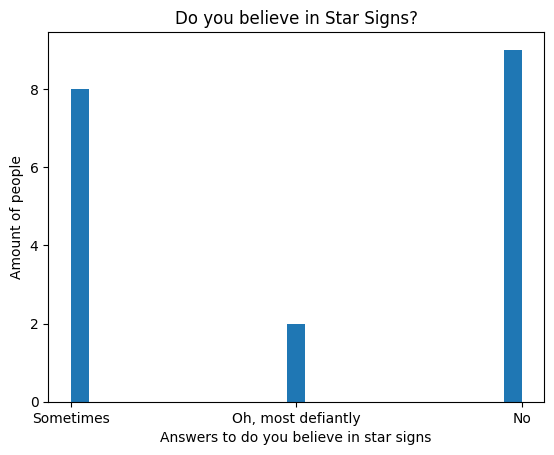

In [56]:
plt.hist(data_df.believe_signs, bins=25)
plt.xlabel('Answers to do you believe in star signs')
plt.ylabel('Amount of people')
plt.title('Do you believe in Star Signs?')
plt.show()

Findings: 9 people do not believe in star signs. 8 believe sometimes and 2 do. 
Most people do not believe in star signs the majority of the time 

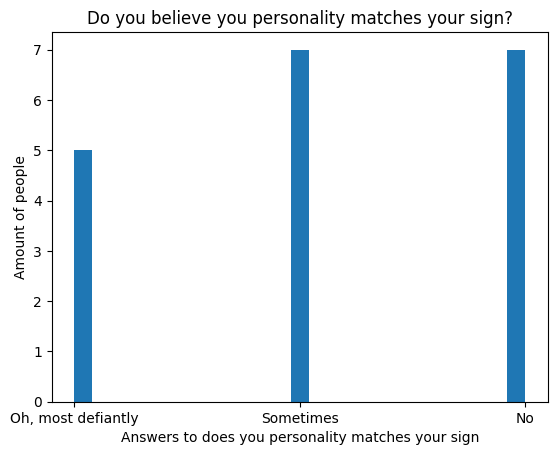

In [10]:
plt.hist(data_df.sign_matches_personality, bins=25)
plt.xlabel('Answers to does you personality matches your sign')
plt.ylabel('Amount of people')
plt.title('Do you believe you personality matches your sign?')
plt.show()

Findings: however, even though the majority do not believe in star signs. 13 people said they believe their personality match their signs or sometimes do. 

In [11]:
#comparing if your introvert or extrovert to your current mood! 
mood_groupings = data_df.groupby('introvert_extrovert')
mood_groupings.current_mood.describe()

,count,mean,std,min,25%,50%,75%,max
introvert_extrovert,,,,,,,,
Extrovert,9.0,6.777778,1.563472,4.0,6.00,7.0,8.0,9.0
Introvert,10.0,7.200000,1.932184,4.0,6.25,7.0,8.0,10.0


Findings:
1. there are more introverts than extroverts 

In [12]:
box_chart_mood = mood_groupings.current_mood.describe()


In [13]:
mood_groupings.current_mood.median()

introvert_extrovert
Extrovert    7.0
Introvert    7.0
Name: current_mood, dtype: float64

Findings: 
1. The average mood was 7 

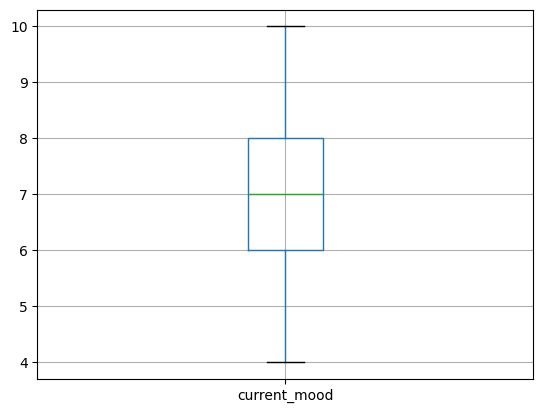

In [14]:
boxplot = data_df.boxplot(column=['current_mood'])
plt.show()

Text(0, 0.5, 'Amount of People')

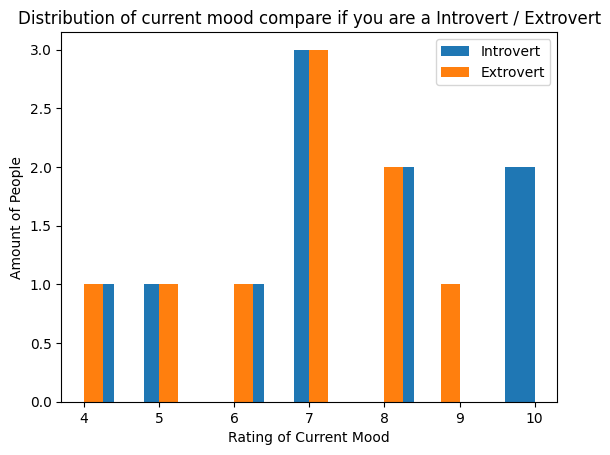

In [31]:
#Graph depicting Distribution of current mood compare with if you are Introvert / Extrovert
#making dataframes for each 
introvert_df = mood_groupings.get_group('Introvert')
extrovert_df = mood_groupings.get_group('Extrovert')
plt.hist(introvert_df.current_mood, bins=15, label='Introvert')
plt.hist(extrovert_df.current_mood, bins=20, label='Extrovert')
plt.legend()
plt.title("Distribution of current mood compare if you are a Introvert / Extrovert")
plt.xlabel("Rating of Current Mood")
plt.ylabel("Amount of People")

#after comparing the data I found 
#these more introverts in the group than extroverts (only one) 


Findings: 
1. It did not make much different in your mood if you are a Introvert vs extrovert. 

Text(0, 0.5, 'Amount of People')

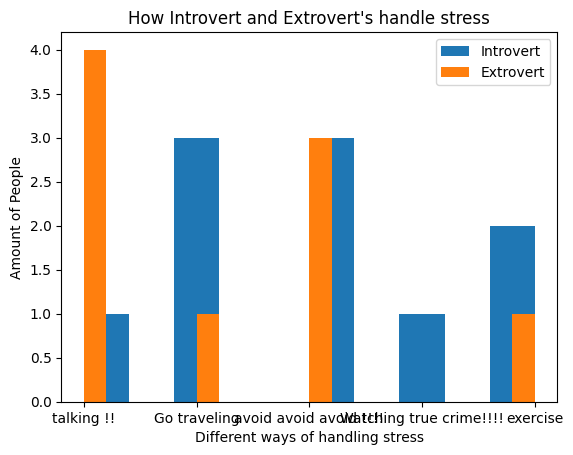

In [62]:
#Graph depicting Distribution of current mood compare with if you are Introvert / Extrovert

introvert_df = mood_groupings.get_group('Introvert')
extrovert_df = mood_groupings.get_group('Extrovert')
plt.hist(introvert_df.handle_stress, bins=10, label='Introvert')
plt.hist(extrovert_df.handle_stress, bins=20, label='Extrovert')
plt.legend()
plt.title("How Introvert and Extrovert's handle stress")
plt.xlabel("Different ways of handling stress")
plt.ylabel("Amount of People")


Findings: 
1. Extroverts are more likely to talk about their stress
2. Introverts are more likely to go traveling 

I have asked people what their star sign is. I have asked them a multi choice question about what word describes them the most, This was based off of words that descibe the star signs the most. I want to see how many people choose the word that describes their star sign.

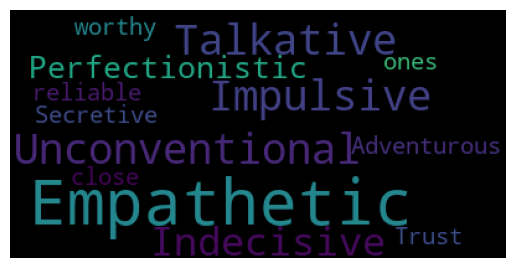

In [59]:
fields = ['describes_most']
text2 = pd.read_csv('charlotte_survey.csv', usecols=fields)

text3 = ' '.join(text2.describes_most)
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [60]:
count_words = data_df.describes_most.value_counts()
count_words


describes_most
Empathetic                                      6
Impulsive                                       2
Unconventional                                  2
Talkative                                       2
Indecisive                                      2
Perfectionistic                                 2
Secretive                                       1
Trust worthy and reliable with my close ones    1
Adventurous                                     1
Name: count, dtype: int64

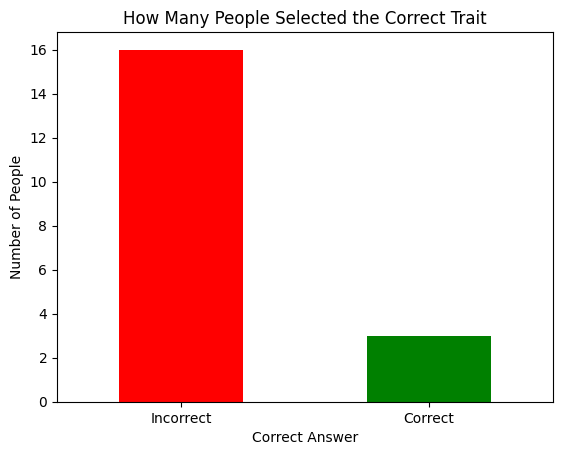

Number of people who selected the correct word: 3
The Number of people who selected a word that did not relate to there sign: 17


In [68]:
zodiac_traits = {
    "Aries": "Impulsive",
    "Taurus": "Stubborn",
    "Gemini": "Talkative",
    "Cancer": "Nurturing",
    "Leo": "Dramatic",
    "Virgo": "Perfectionistic",
    "Libra": "Indecisive",
    "Scorpio": "Secretive",
    "Sagittarius": "Adventurous",
    "Capricorn": "Disciplined",
    "Aquarius": "Unconventional",
    "Pisces": "Empathetic"
}
    
#mapping the star sings to the values in the dict 
data_df['Correct Word'] = data_df['star_sign'].map(zodiac_traits)

#
data_df['Is Correct'] = data_df.describes_most == data_df['Correct Word']

#count correct 
correct_count = data_df['Is Correct'].sum()
wrong_count = 19-3

#counting results
results = data_df['Is Correct'].value_counts()

#plot the results as a chart
results.plot(kind='bar', color=['red', 'green'])
plt.title('How Many People Selected the Correct Trait')
plt.xlabel('Correct Answer')
plt.ylabel('Number of People')
plt.xticks(ticks=[0, 1], labels=['Incorrect', 'Correct'], rotation=0)  # Customizing labels
plt.show()
print(f"Number of people who selected the correct word: {correct_count}")
print(f"The Number of people who selected a word that did not relate to there sign: 17") 


Findings: 
1. most people put the wrong trait for their star sign when asked what word described them the most
2. 3 people got it right!!!
3. comparing this to how most people thought their personailty match their star sign this is interesting. 

In [34]:
display(data_df)

,Timestamp,star_sign,sign_matches_personality,believe_signs,current_mood,rather_fight,introvert_extrovert,type_introvert,type_extrovert,rather_live_world,describe__artist_practice,handle_stress,describes_most,"""""",Correct Word,Is Correct
0,2024/10/17 2:07:11 pm CET,Gemini,"Oh, most defiantly",Sometimes,7,1 horse-sized duck,Introvert,Thinking introverts,NaN,van Gogh,gamifying things!,talking !!,Empathetic,van Gogh,Talkative,False
1,2024/10/17 2:07:29 pm CET,Gemini,"Oh, most defiantly","Oh, most defiantly",7,1 horse-sized duck,Extrovert,NaN,Extroverted sensors,Dali,Creative Technologist!,Go traveling,Empathetic,van Gogh,Talkative,False
2,2024/10/17 2:07:32 pm CET,Taurus,Sometimes,Sometimes,9,100 duck-sized horses,Extrovert,NaN,Extroverted intuitives,Egon Schiele,Creative Technologist!,avoid avoid avoid !!!!,Impulsive,van Gogh,Stubborn,False
3,2024/10/17 2:10:00 pm CET,Sagittarius,"Oh, most defiantly","Oh, most defiantly",7,1 horse-sized duck,Extrovert,NaN,Extroverted intuitives,Dali,Creative Technologist!,exercise,Impulsive,NaN,Adventurous,False
4,2024/10/17 2:10:14 pm CET,Capricorn,Sometimes,No,4,100 duck-sized horses,Introvert,Thinking introverts,NaN,Dali,Creative Technologist!,Go traveling,Unconventional,NaN,Disciplined,False
5,2024/10/17 2:11:17 pm CET,Aquarius,Sometimes,Sometimes,8,100 duck-sized horses,Extrovert,NaN,Extroverted intuitives,Dali,Artist,talking !!,Unconventional,NaN,Unconventional,True
6,2024/10/17 2:11:54 pm CET,Capricorn,No,No,10,1 horse-sized duck,Introvert,Social introverts,Extroverted intuitives,van Gogh,Creative Technologist!,avoid avoid avoid !!!!,Secretive,NaN,Disciplined,False
7,2024/10/17 2:12:24 pm CET,Capricorn,No,No,6,1 horse-sized duck,Extrovert,NaN,NaN,Dali,Creative Technologist!,avoid avoid avoid !!!!,Talkative,NaN,Disciplined,False
8,2024/10/17 2:15:56 pm CET,Pisces,"Oh, most defiantly",Sometimes,5,1 horse-sized duck,Introvert,Anxious introverts,NaN,Monet,Creative Technologist!,avoid avoid avoid !!!!,Empathetic,NaN,Empathetic,True
9,2024/10/17 2:17:58 pm CET,Leo,Sometimes,Sometimes,6,1 horse-sized duck,Introvert,Thinking introverts,NaN,van Gogh,Creative Technologist!,Go traveling,Empathetic,NaN,Dramatic,False


In [35]:
incorrect_folks_df = data_df[[person for person in data_df['Is Correct'] == False]]

In [36]:
display(incorrect_folks_df) 

,Timestamp,star_sign,sign_matches_personality,believe_signs,current_mood,rather_fight,introvert_extrovert,type_introvert,type_extrovert,rather_live_world,describe__artist_practice,handle_stress,describes_most,"""""",Correct Word,Is Correct
0,2024/10/17 2:07:11 pm CET,Gemini,"Oh, most defiantly",Sometimes,7,1 horse-sized duck,Introvert,Thinking introverts,NaN,van Gogh,gamifying things!,talking !!,Empathetic,van Gogh,Talkative,False
1,2024/10/17 2:07:29 pm CET,Gemini,"Oh, most defiantly","Oh, most defiantly",7,1 horse-sized duck,Extrovert,NaN,Extroverted sensors,Dali,Creative Technologist!,Go traveling,Empathetic,van Gogh,Talkative,False
2,2024/10/17 2:07:32 pm CET,Taurus,Sometimes,Sometimes,9,100 duck-sized horses,Extrovert,NaN,Extroverted intuitives,Egon Schiele,Creative Technologist!,avoid avoid avoid !!!!,Impulsive,van Gogh,Stubborn,False
3,2024/10/17 2:10:00 pm CET,Sagittarius,"Oh, most defiantly","Oh, most defiantly",7,1 horse-sized duck,Extrovert,NaN,Extroverted intuitives,Dali,Creative Technologist!,exercise,Impulsive,NaN,Adventurous,False
4,2024/10/17 2:10:14 pm CET,Capricorn,Sometimes,No,4,100 duck-sized horses,Introvert,Thinking introverts,NaN,Dali,Creative Technologist!,Go traveling,Unconventional,NaN,Disciplined,False
6,2024/10/17 2:11:54 pm CET,Capricorn,No,No,10,1 horse-sized duck,Introvert,Social introverts,Extroverted intuitives,van Gogh,Creative Technologist!,avoid avoid avoid !!!!,Secretive,NaN,Disciplined,False
7,2024/10/17 2:12:24 pm CET,Capricorn,No,No,6,1 horse-sized duck,Extrovert,NaN,NaN,Dali,Creative Technologist!,avoid avoid avoid !!!!,Talkative,NaN,Disciplined,False
9,2024/10/17 2:17:58 pm CET,Leo,Sometimes,Sometimes,6,1 horse-sized duck,Introvert,Thinking introverts,NaN,van Gogh,Creative Technologist!,Go traveling,Empathetic,NaN,Dramatic,False
10,2024/10/17 4:40:41 pm CET,Scorpio,"Oh, most defiantly",Sometimes,5,100 duck-sized horses,Extrovert,NaN,"Extroverted feelers,",van Gogh,Creative,talking !!,Talkative,NaN,Secretive,False
11,2024/10/17 5:03:13 pm CET,Cancer,No,Sometimes,7,1 horse-sized duck,Introvert,Restrained/inhibited introverts,NaN,Egon Schiele,Designers,Watching true crime!!!!,Indecisive,NaN,Nurturing,False


In [37]:
incorrect_folks_df.star_sign.value_counts() 

#then use group by

star_sign
Gemini         3
Capricorn      3
Taurus         2
Cancer         2
Leo            1
Sagittarius    1
Scorpio        1
Aries          1
Libra          1
Aquarius       1
Name: count, dtype: int64

In [38]:
correct_folks_df = data_df[[person for person in data_df['Is Correct'] == True]]
correct_folks_df.star_sign.value_counts() 

star_sign
Aquarius       1
Pisces         1
Sagittarius    1
Name: count, dtype: int64

In [39]:
incorrect_folks_df.head()

,Timestamp,star_sign,sign_matches_personality,believe_signs,current_mood,rather_fight,introvert_extrovert,type_introvert,type_extrovert,rather_live_world,describe__artist_practice,handle_stress,describes_most,"""""",Correct Word,Is Correct
0,2024/10/17 2:07:11 pm CET,Gemini,"Oh, most defiantly",Sometimes,7,1 horse-sized duck,Introvert,Thinking introverts,NaN,van Gogh,gamifying things!,talking !!,Empathetic,van Gogh,Talkative,False
1,2024/10/17 2:07:29 pm CET,Gemini,"Oh, most defiantly","Oh, most defiantly",7,1 horse-sized duck,Extrovert,NaN,Extroverted sensors,Dali,Creative Technologist!,Go traveling,Empathetic,van Gogh,Talkative,False
2,2024/10/17 2:07:32 pm CET,Taurus,Sometimes,Sometimes,9,100 duck-sized horses,Extrovert,NaN,Extroverted intuitives,Egon Schiele,Creative Technologist!,avoid avoid avoid !!!!,Impulsive,van Gogh,Stubborn,False
3,2024/10/17 2:10:00 pm CET,Sagittarius,"Oh, most defiantly","Oh, most defiantly",7,1 horse-sized duck,Extrovert,NaN,Extroverted intuitives,Dali,Creative Technologist!,exercise,Impulsive,NaN,Adventurous,False
4,2024/10/17 2:10:14 pm CET,Capricorn,Sometimes,No,4,100 duck-sized horses,Introvert,Thinking introverts,NaN,Dali,Creative Technologist!,Go traveling,Unconventional,NaN,Disciplined,False


In [40]:
sign_groupings = incorrect_folks_df.groupby('star_sign')
sign_groupings

In [41]:
pd.DataFrame(sign_groupings)

,0,1
0,Aquarius,Timestamp star_sign sign_...
1,Aries,Timestamp star_sign sign_m...
2,Cancer,Timestamp star_sign sign_m...
3,Capricorn,Timestamp star_sign sign_m...
4,Gemini,Timestamp star_sign sign_m...
5,Leo,Timestamp star_sign sign_ma...
6,Libra,Timestamp star_sign sign_m...
7,Sagittarius,Timestamp star_sign sign...
8,Scorpio,Timestamp star_sign sign_m...
9,Taurus,Timestamp star_sign sign_m...


In [42]:

#put data frame in front of the brackets!!!!!!!!!!!!!!!! 


grouping_gemini= data_df[data_df['star_sign']=='Gemini']
grouping_gemini


,Timestamp,star_sign,sign_matches_personality,believe_signs,current_mood,rather_fight,introvert_extrovert,type_introvert,type_extrovert,rather_live_world,describe__artist_practice,handle_stress,describes_most,"""""",Correct Word,Is Correct
0,2024/10/17 2:07:11 pm CET,Gemini,"Oh, most defiantly",Sometimes,7,1 horse-sized duck,Introvert,Thinking introverts,NaN,van Gogh,gamifying things!,talking !!,Empathetic,van Gogh,Talkative,False
1,2024/10/17 2:07:29 pm CET,Gemini,"Oh, most defiantly","Oh, most defiantly",7,1 horse-sized duck,Extrovert,NaN,Extroverted sensors,Dali,Creative Technologist!,Go traveling,Empathetic,van Gogh,Talkative,False
13,2024/10/17 7:17:09 pm CET,Gemini,No,No,4,1 horse-sized duck,Extrovert,NaN,"Extroverted feelers,",NaN,NaN,talking !!,Trust worthy and reliable with my close ones,NaN,Talkative,False


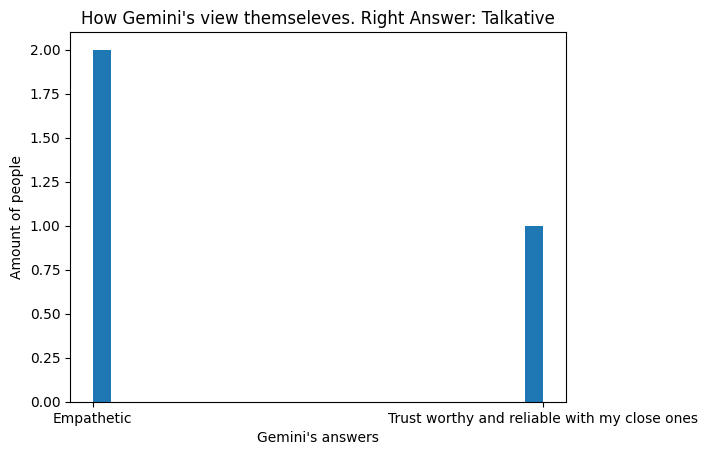

In [43]:
plt.hist(grouping_gemini.describes_most, bins=25)
plt.xlabel("Gemini's answers")
plt.ylabel('Amount of people')
plt.title("How Gemini's view themseleves. Right Answer: Talkative")
plt.show()


Findings: 
1. Most Gemini thought of themseleves as Empathetic

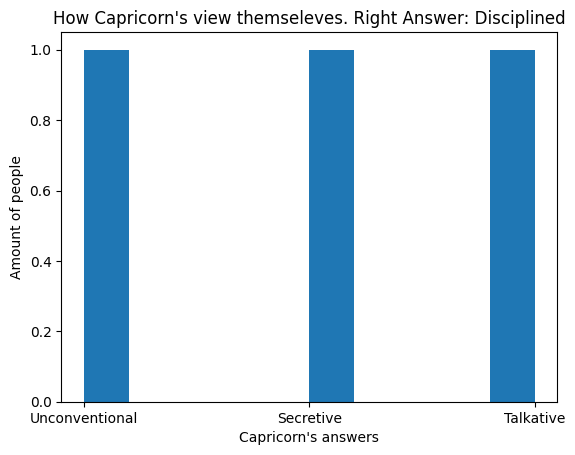

In [45]:
grouping_Capricorn= data_df[data_df['star_sign']=='Capricorn']

plt.hist(grouping_Capricorn.describes_most, bins=10)
plt.xlabel("Capricorn's answers")
plt.ylabel('Amount of people')
plt.title("How Capricorn's view themseleves. Right Answer: Disciplined")
plt.show()

Findings: 
1. One Capricorn think they are Talkative which tradtionally is the opposite to disciplined 

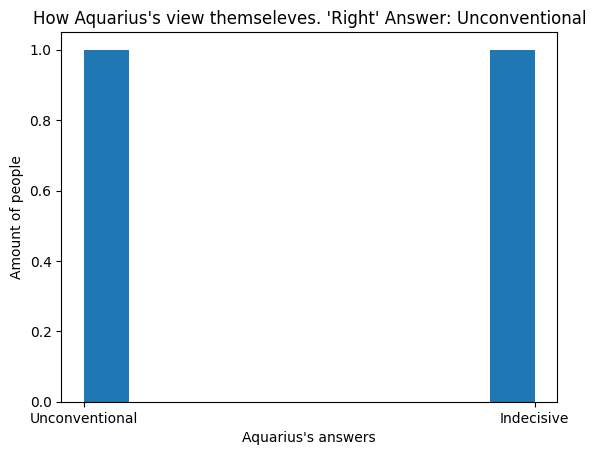

In [46]:
grouping_Aquarius = data_df[data_df['star_sign']=='Aquarius']

plt.hist(grouping_Aquarius.describes_most, bins=10)
plt.xlabel("Aquarius's answers")
plt.ylabel('Amount of people')
plt.title("How Aquarius's view themseleves. 'Right' Answer: Unconventional")
plt.show()

**Findings:**
1. Aquarius was right
2. the other thought they were indescisive which is something that is not usually a trait accoicated with Aquarius (or to the best of knowlegde!!) 

In [66]:
table = pd.crosstab(data_df['star_sign'], data_df['describes_most'])
table

describes_most,Adventurous,Empathetic,Impulsive,Indecisive,Perfectionistic,Secretive,Talkative,Trust worthy and reliable with my close ones,Unconventional
star_sign,,,,,,,,,
Aquarius,0,0,0,1,0,0,0,0,1
Aries,0,1,0,0,0,0,0,0,0
Cancer,0,0,0,1,1,0,0,0,0
Capricorn,0,0,0,0,0,1,1,0,1
Gemini,0,2,0,0,0,0,0,1,0
Leo,0,1,0,0,0,0,0,0,0
Libra,0,0,0,0,1,0,0,0,0
Pisces,0,1,0,0,0,0,0,0,0
Sagittarius,1,0,1,0,0,0,0,0,0


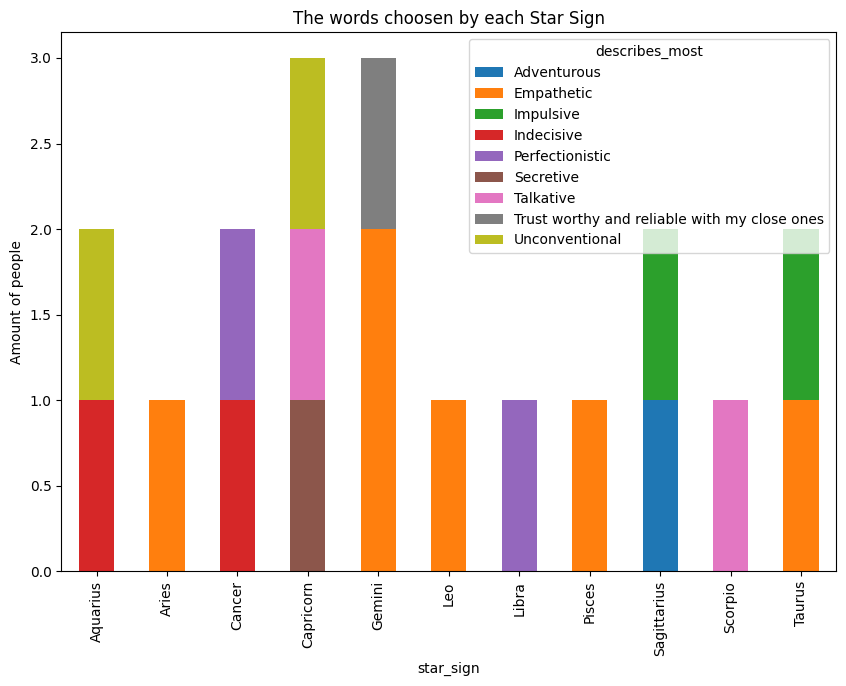

In [86]:
tacked_data = pd.crosstab([data_df['star_sign']], [data_df['describes_most']])
tacked_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('The words choosen by each Star Sign')
plt.ylabel('Amount of people')
plt.show()